Problem 1

1. Speech recognition, image recognition, machine transltion, etc.
2. Image recognition, natural language processing (semantic parsing, search query retrieval, sentence modeling, classification, prediction, etc.), etc.
3. Machine translation, robot control, speech recognition, etc.
4. Natural language processing (word embeddings, machine translation, document clustering, sentiment analysis, paraphrase detection, etc), etc.
5. Prediction of protein contact map.
6. Robotics, games, natural language processing, etc.

Problem 2

1. $$MSE = \frac{1}{n} \sum_{i=1}^{m} (w^Tx^{(i)} - y^{(i)})^2 \\ 
         = \frac{1}{n} (Xw-y)^T(Xw-y)                          \\
         = \frac{1}{n} ((Xw)^TXw - (Xw)^Ty - y^TXw + y^Ty)     \\
         = \frac{1}{n} (w^TX^TXw - 2(Xw)^Ty + y^Ty)            \\
   $$
   
   
   Thus, $$\frac{\partial MSE}{\partial w} = 2X^TXw - 2X^Ty = 0 \\
           X^TXw = X^Ty                                         \\
           w = (X^TX)^{-1}X^Ty
   $$


In [164]:
# 2.2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot(n, sigma):
    x = np.zeros((n, 1))
    y = np.zeros((n, 1))
    for i in range(n):
        x[i, 0] = np.random.uniform(-1, 3)
    x = np.sort(x, axis = 0) # for 2.3 to plot fitted curves
    for i in range(n):
        y[i, 0] = x[i, 0] ** 2 - 3 * x[i, 0] + 1 + np.random.normal(0, sigma)
    plt.xlabel('N = %d, sigma = %0.2f' % (n, sigma))
    plt.plot(x, y, 'k.')
    plt.show()
    return (x, y)

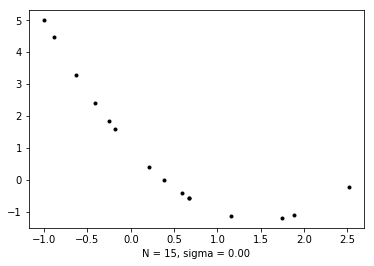

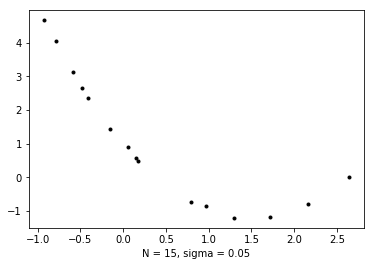

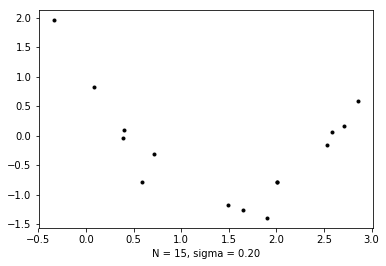

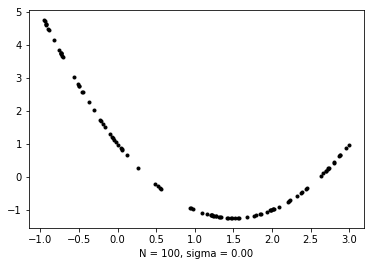

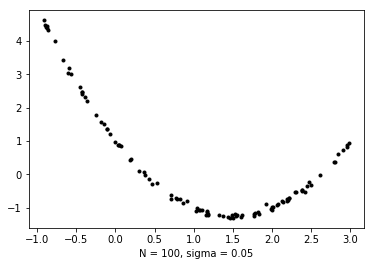

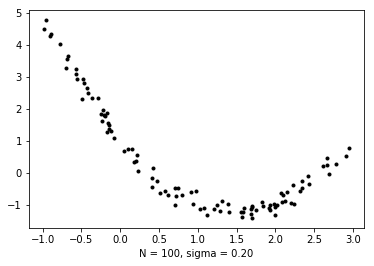

In [165]:
np.random.seed(1)
(x1, y1) = plot(15, 0)
(x2, y2) = plot(15, 0.05)
(x3, y3) = plot(15, 0.2)
(x4, y4) = plot(100, 0)
(x5, y5) = plot(100, 0.05)
(x6, y6) = plot(100, 0.2)

In [166]:
# 2.3
def fit(x_, y, degree):
    n = x_.shape[0]
    x = np.ones((n, 1))
    for i in range(1, degree + 1):
        x = np.append(x, np.power(x_, i), axis = 1)
    # normal equation
    w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    yhat = x.dot(w)
    mse = np.mean((yhat - y) ** 2)
    plt.plot(x_, y, 'k.')
    plt.plot(x[:, 1], yhat)
    return (w, mse)

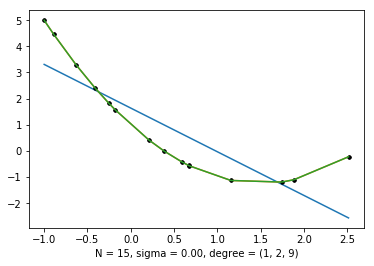

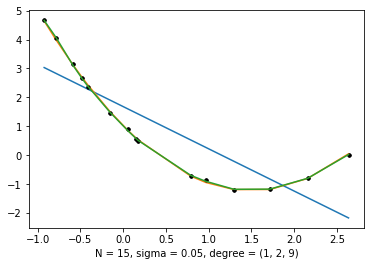

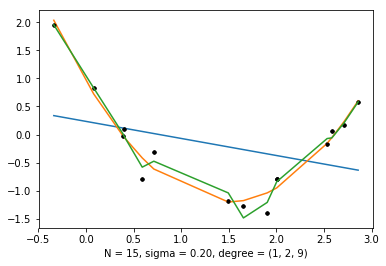

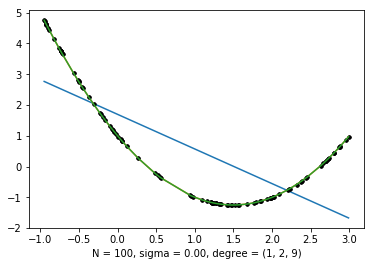

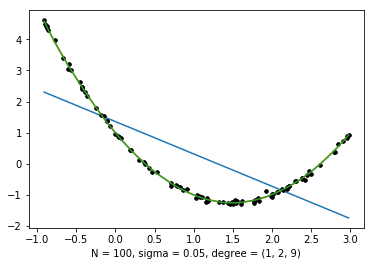

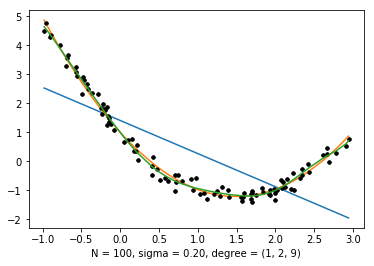

In [167]:
# Note that in some plots, the curve with degree 9 covers the one with degree 2.

# N = 15, sigma = 0, polynomial of degree 1, 2, 9
plt.xlabel('N = 15, sigma = 0.00, degree = (1, 2, 9)')
(w11, mse11) = fit(x1, y1, 1)
(w12, mse12) = fit(x1, y1, 2)
(w19, mse19) = fit(x1, y1, 9)
plt.show()

# N = 15, sigma = 0.05, polynomial of degree 1, 2, 9
plt.xlabel('N = 15, sigma = 0.05, degree = (1, 2, 9)')
(w21, mse21) = fit(x2, y2, 1)
(w22, mse22) = fit(x2, y2, 2)
(w29, mse29) = fit(x2, y2, 9)
plt.show()

# N = 15, sigma = 0.20, polynomial of degree 1, 2, 9
plt.xlabel('N = 15, sigma = 0.20, degree = (1, 2, 9)')
(w31, mse31) = fit(x3, y3, 1)
(w32, mse32) = fit(x3, y3, 2)
(w39, mse39) = fit(x3, y3, 9)
plt.show()

# N = 100, sigma = 0, polynomial of degree 1, 2, 9
plt.xlabel('N = 100, sigma = 0.00, degree = (1, 2, 9)')
(w41, mse41) = fit(x4, y4, 1)
(w42, mse42) = fit(x4, y4, 2)
(w49, mse49) = fit(x4, y4, 9)
plt.show()

# N = 100, sigma = 0.05, polynomial of degree 1, 2, 9
plt.xlabel('N = 100, sigma = 0.05, degree = (1, 2, 9)')
(w51, mse51) = fit(x5, y5, 1)
(w52, mse52) = fit(x5, y5, 2)
(w59, mse59) = fit(x5, y5, 9)
plt.show()

# N = 100, sigma = 0.20, polynomial of degree 1, 2, 9
plt.xlabel('N = 100, sigma = 0.20, degree = (1, 2, 9)')
(w61, mse61) = fit(x6, y6, 1)
(w62, mse62) = fit(x6, y6, 2)
(w69, mse69) = fit(x6, y6, 9)
plt.show()


In [168]:
pd.set_option('max_colwidth', 500)
data = [["N = 15, sigma = 0.00", w11, w12, w19], 
        ["N = 15, sigma = 0.05", w21, w22, w29], 
        ["N = 15, sigma = 0.20", w31, w32, w39], 
        ["N = 100, sigma = 0.00", w41, w42, w49],
        ["N = 100, sigma = 0.05", w51, w52, w59],
        ["N = 100, sigma = 0.20", w61, w62, w69]]
pd.DataFrame(data, columns = ["", "degree = 1", "degree = 2", "degree = 9"])

,,degree = 1,degree = 2,degree = 9
0,"N = 15, sigma = 0.00","[[1.6371938461087943], [-1.6718875781529055]]","[[1.0000000000000004], [-3.0000000000000004], [0.9999999999999998]]","[[0.9999999927772656], [-2.999999990594605], [0.9999999964553066], [1.1838565683319757e-09], [6.689759857181343e-12], [-4.875317927144351e-10], [1.6722001561220168e-10], [9.672618261902244e-11], [-6.759037773917953e-11], [1.1393552767913206e-11]]"
1,"N = 15, sigma = 0.05","[[1.6798818348172875], [-1.4627657038120827]]","[[1.0213854688266248], [-3.0021410124447776], [0.9987196678901316]]","[[1.0083836970971045], [-2.990980737902643], [0.7385798661858978], [0.3168445674495963], [0.9522044629787558], [-1.2754695687547937], [-0.28964205521870046], [1.0003742529193893], [-0.4712623047420976], [0.06890320971217223]]"
2,"N = 15, sigma = 0.20","[[0.23365786121703452], [-0.303718346377993]]","[[0.9488399926949603], [-2.8819558231955775], [0.9651832726695337]]","[[0.2805260836704373], [9.532254397195045], [-30.210800630906206], [-54.609486508530466], [292.1397695026054], [-424.21718350418746], [301.78415386185367], [-115.45338324674726], [22.8072746227897], [-1.829264454698533]]"
3,"N = 100, sigma = 0.00","[[1.6949160281185234], [-1.125427996643497]]","[[0.9999999999999964], [-3.000000000000008], [1.0000000000000038]]","[[0.9999999790472597], [-2.9999999925806238], [1.0000000027039553], [-3.6421037297174053e-09], [1.4796475156231281e-09], [-1.194414567251556e-10], [-4.0463099537646485e-10], [3.0567681719162465e-10], [-8.912848237230264e-11], [9.0829010979121e-12]]"
4,"N = 100, sigma = 0.05","[[1.3535500258425126], [-1.042213312682539]]","[[0.9934263138111532], [-3.0048082167683576], [1.0029360508742777]]","[[0.9876012414639869], [-3.0410841671868374], [1.0774866135256043], [0.14067295746632258], [-0.29224684306789506], [0.006735329110926447], [0.24058799232623418], [-0.1712240841125361], [0.0469860607006678], [-0.004650388501618405]]"
5,"N = 100, sigma = 0.20","[[1.405726797687526], [-1.142454647720425]]","[[0.9995917303072223], [-2.971641758504708], [0.9941900470699819]]","[[0.9921662707494157], [-3.407604751409391], [0.9441879827992232], [1.0646647677418484], [0.02719065849011848], [-0.84958536792009], [0.07505171904261587], [0.3499517004616921], [-0.15933829502689179], [0.02045039752717523]]"


In [169]:
data = [["N = 15, sigma = 0.00", mse11, mse12, mse19], 
        ["N = 15, sigma = 0.05", mse21, mse22, mse29], 
        ["N = 15, sigma = 0.20", mse31, mse32, mse39], 
        ["N = 100, sigma = 0.00", mse41, mse42, mse49],
        ["N = 100, sigma = 0.05", mse51, mse52, mse59],
        ["N = 100, sigma = 0.20", mse61, mse62, mse69]]
pd.DataFrame(data, columns = ["", "degree = 1", "degree = 2", "degree = 9"])

,,degree = 1,degree = 2,degree = 9
0,"N = 15, sigma = 0.00",1.117629,7.003195e-31,9.588761e-17
1,"N = 15, sigma = 0.05",1.081584,1.951657e-03,9.506143e-04
2,"N = 15, sigma = 0.20",0.653202,3.090588e-02,1.437994e-02
3,"N = 100, sigma = 0.00",1.581824,2.778707e-29,2.696331e-16
4,"N = 100, sigma = 0.05",1.364661,2.411562e-03,2.336667e-03
5,"N = 100, sigma = 0.20",1.127602,3.722718e-02,3.120290e-02


From MSEs, polynomial of degree 2 and 9 overfit the data.

In [170]:
# 2.4
def fitL2NormReg(x_, y, degree, lmd):
    n = x_.shape[0]
    x = np.ones((n, 1))
    for i in range(1, degree + 1):
        x = np.append(x, np.power(x_, i), axis = 1)
    # normal equation with L2 norm regularization
    I = np.identity(degree + 1)
    w = np.linalg.inv(x.T.dot(x) + lmd * I).dot(x.T).dot(y)
    yhat = x.dot(w)
    mse = np.mean((yhat - y) ** 2)
    plt.plot(x_, y, 'k.')
    plt.plot(x[:, 1], yhat)
    return (w, mse)

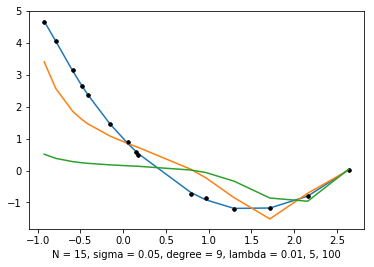

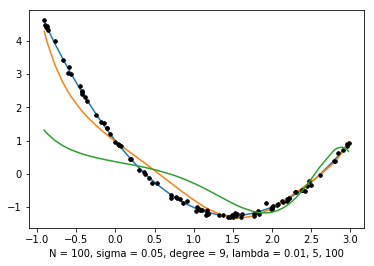

In [171]:
# N = 15, sigma = 0.05, polynomial of degree 9, lambda = 0.01, 5, 100
plt.xlabel('N = 15, sigma = 0.05, degree = 9, lambda = 0.01, 5, 100')
(w29_s, mse29_s) = fitL2NormReg(x2, y2, 9, 0.01)
(w29_m, mse29_m) = fitL2NormReg(x2, y2, 9, 5)
(w29_l, mse29_l) = fitL2NormReg(x2, y2, 9, 100)
plt.show()

# N = 100, sigma = 0.05, polynomial of degree 9, lambda = 0.01, 5, 100
plt.xlabel('N = 100, sigma = 0.05, degree = 9, lambda = 0.01, 5, 100')
(w59_s, mse59_s) = fitL2NormReg(x5, y5, 9, 0.01)
(w59_m, mse59_m) = fitL2NormReg(x5, y5, 9, 5)
(w59_l, mse59_l) = fitL2NormReg(x5, y5, 9, 100)
plt.show()


In [172]:
pd.set_option('max_colwidth', 500)
data = [["N = 15, sigma = 0.05, degree = 9", w29_s, w29_m, w29_l],
        ["N = 100, sigma = 0.05, degree = 9", w29_s, w29_m, w29_l]]
pd.DataFrame(data, columns = ["", "lambda = 0.01", "lambda = 5", "lambda = 100"])


,,lambda = 0.01,lambda = 5,lambda = 100
0,"N = 15, sigma = 0.05, degree = 9","[[0.9988508608389401], [-2.830867305624155], [1.0310433347427594], [-0.3770983830440462], [0.3006760393400105], [0.005759177698207996], [-0.23130678093063195], [0.2234957423978653], [-0.08823470248474818], [0.012469151829279684]]","[[0.9042047734438948], [-1.0745652867287698], [0.36370287965514775], [-0.5818119608157046], [0.25820497443891527], [-0.3073486593981001], [0.2590703325792754], [-0.20239851939357145], [0.12101340051447165], [-0.024951373903077737]]","[[0.1547670847772128], [-0.13209636727848195], [0.048027262635423874], [-0.09339565037885221], [0.013967013408123351], [-0.07722972814930745], [0.007403725400941767], [-0.04084897735842005], [0.047092001169725624], [-0.010638831404008477]]"
1,"N = 100, sigma = 0.05, degree = 9","[[0.9988508608389401], [-2.830867305624155], [1.0310433347427594], [-0.3770983830440462], [0.3006760393400105], [0.005759177698207996], [-0.23130678093063195], [0.2234957423978653], [-0.08823470248474818], [0.012469151829279684]]","[[0.9042047734438948], [-1.0745652867287698], [0.36370287965514775], [-0.5818119608157046], [0.25820497443891527], [-0.3073486593981001], [0.2590703325792754], [-0.20239851939357145], [0.12101340051447165], [-0.024951373903077737]]","[[0.1547670847772128], [-0.13209636727848195], [0.048027262635423874], [-0.09339565037885221], [0.013967013408123351], [-0.07722972814930745], [0.007403725400941767], [-0.04084897735842005], [0.047092001169725624], [-0.010638831404008477]]"


In [173]:
data = [["N = 15, sigma = 0.05, degree = 9", mse29_s, mse29_m, mse29_l],
        ["N = 100, sigma = 0.05, degree = 9", mse59_s, mse59_m, mse59_l]]
pd.DataFrame(data, columns = ["", "lambda = 0.01", "lambda = 5", "lambda = 100"])

,,lambda = 0.01,lambda = 5,lambda = 100
0,"N = 15, sigma = 0.05, degree = 9",0.001157,0.595665,3.602725
1,"N = 100, sigma = 0.05, degree = 9",0.002360,0.074709,1.324619


lambda = 0.01, 5, 100 correspond to overfitting, appropriate fitting, and underfitting, respectively on polynomial of degree 9.

Problem 3

In [174]:
# 3.1
from sklearn import preprocessing

data = np.loadtxt('data_seed.dat', dtype = None)
np.random.shuffle(data)                          # random shuffle
data[:, 0:7] = preprocessing.scale(data[:, 0:7]) # normalization
(n, m) = data.shape

ff = np.split(data, 5)

In [175]:
# 3.2
from sklearn.neighbors import NearestNeighbors

def knn(train, test, k):
    nbrs = NearestNeighbors(n_neighbors=k).fit(train[:, 0:7])
    error = 0
    for t in test:
        # distances between t and the k nearest neighbors, and their indices
        distances, indices = nbrs.kneighbors(t[0:7].reshape(1, -1)) # dim. = (1, k)
        votes = train[indices, 7]
        (candidates, counts) = np.unique(votes, return_counts=True)
        prediction = candidates[np.argmax(counts)] # candidate with the most votes
        error = (error + 1) if t[7] != prediction else error
    return error


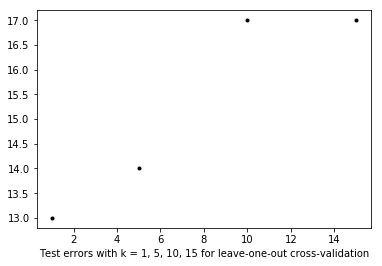

In [176]:
# leave-one-out cross validation with k = 1, 5, 10, 15
errors = [0] * 4
for i in range(0, n):
    train = data[np.arange(n) != i, :]
    test = np.reshape(data[i, :], (1, 8)) # needed because of the for loop of knn(...)
    errors[0] += knn(train, test, 1)
    errors[1] += knn(train, test, 5)
    errors[2] += knn(train, test, 10)
    errors[3] += knn(train, test, 15)

plt.plot([1, 5, 10, 15], errors, 'k.')
plt.xlabel('Test errors with k = 1, 5, 10, 15 for leave-one-out cross-validation')
plt.show()

As can be seen from the above plot, k = 1 tends to overfit the data, because the 1-nearest neighbor of a point is the point itself. 

As k grows to 5, 10, 15, etc, KNN tends to appropriately fit the data, with potential risk of underfitting when k becomes too large, although this doesn't seem to appear in the above situation.

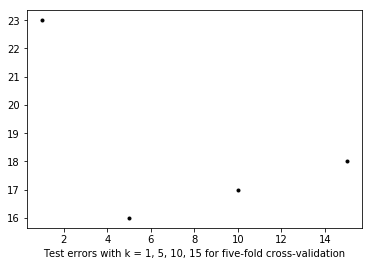

In [177]:
# five-fold cross validation with k = 1, 5, 10, 15
errors = [0] * 4
for i in range(0, 5):
    train = (ff[0:i] + ff[i+1:5])[0]
    test = np.array(ff[i])
    errors[0] += knn(train, test, 1)
    errors[1] += knn(train, test, 5)
    errors[2] += knn(train, test, 10)
    errors[3] += knn(train, test, 15)

plt.plot([1, 5, 10, 15], errors, 'k.')
plt.xlabel('Test errors with k = 1, 5, 10, 15 for five-fold cross-validation')
plt.show()

Results with 5-fold cross validation is similar to those with leave-one-out cross validation (i.e., k = 1 tends to overfit, large k tends to underfit, while some value of k in between appropriately fits teh data).

Also test errors with 5-fold cross validation are generally higher than those with leave-one-out cross validation, because the more folds are used, the closer to approximation is to training on the entire dataset.

In [178]:
# 3.3
# SVM
from sklearn.svm import SVC

clf = SVC(kernel='rbf', gamma='auto') # default kernel is Gaussian ('rbf')

train_errors = 0
test_errors = 0
for i in range(0, 5): # five-fold cross-validation
    train = (ff[0:i] + ff[i+1:5])[0]
    test = np.array(ff[i])
    clf.fit(train[:, 0:7], train[:, 7])
    train_errors += sum(clf.predict(train[:, 0:7]) != train[:, 7])
    test_errors += sum(clf.predict(test[:, 0:7]) != test[:, 7])

(train_errors, test_errors)

(23, 17)

Using SVM, the training error and testing error are 23 and 17, repsctively. SVM fits the data appropriately, since errors are within a reasonable range and testing error doesn't exceed training error.

Note that one can vary the kernal of the classifier (e.g., 'linear', 'poly', 'sigmoid', etc), however the Guassian kernel performs the best without overfitting or underfitting the data.

In [179]:
# Decision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()

train_errors = 0
test_errors = 0
for i in range(0, 5): # five-fold cross-validation
    train = (ff[0:i] + ff[i+1:5])[0]
    test = np.array(ff[i])
    clf.fit(train[:, 0:7], train[:, 7])
    train_errors += sum(clf.predict(train[:, 0:7]) != train[:, 7])
    test_errors += sum(clf.predict(test[:, 0:7]) != test[:, 7])

(train_errors, test_errors)

(0, 26)

Using Decision Trees, the training error and testing error are 0 and 26, respectively.

This suggests that devision trees overfit the data, since it fits the training data perfectly but performs poorly on the testing data.

Comparing SVM and Decistion Trees, SVM performs better. Comparing SVM with KNN, they perform similarly to each other, under the same cross validation scenario (5-fold), although as we've seen, KNN with leave-one-out performs slightly better.

Problem 4 (See ff242-prob4.pdf for 4.1, 4.2 and 4.5)

In [180]:
# 4.3
def prob43(x0, x1, x2):
    temp1 = 0.6 * x0 + 0.5 * x1 - 0.6 * x2 - 0.4
    temp2 = -0.7 * x0 + 0.4 * x1 + 0.8 * x2 - 0.5
    return temp1 + temp2 - 0.5

In [181]:
output = [prob43(0, 0, 0), prob43(0, 0, 1), prob43(0, 1, 0), prob43(1, 0, 0), 
          prob43(0, 1, 1), prob43(1, 0, 1), prob43(1, 1, 0), prob43(1, 1, 1)]
output

[-1.4,
 -1.2,
 -0.5,
 -1.5,
 -0.2999999999999998,
 -1.2999999999999998,
 -0.5999999999999999,
 -0.3999999999999998]

In [182]:
# 4.4
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prob44(x0, x1, x2):
    temp1 = sigmoid(0.6 * x0 + 0.5 * x1 - 0.6 * x2 - 0.4)
    temp2 = sigmoid(-0.7 * x0 + 0.4 * x1 + 0.8 * x2 - 0.5)
    return sigmoid(temp1 + temp2 - 0.5)

In [183]:
output = [prob44(0, 0, 0), prob44(0, 0, 1), prob44(0, 1, 0), prob44(1, 0, 0), 
          prob44(0, 1, 1), prob44(1, 0, 1), prob44(1, 1, 0), prob44(1, 1, 1)]
output

[0.5692650013354738,
 0.5850122870764839,
 0.6224593312018545,
 0.569867165880021,
 0.6331439900185163,
 0.5750840158888638,
 0.6173258807992257,
 0.6283113278311999]